In [1]:
import pandas as pd

output = pd.read_csv("../output/output_original-20240218-165024.csv")

Plotting the distribution of the scores

(array([   4.,   23.,   61.,  113.,  151.,  148.,  240.,  325., 1582.,
        3499.]),
 array([-5.87764015e+01, -5.28988081e+01, -4.70212146e+01, -4.11436212e+01,
        -3.52660277e+01, -2.93884343e+01, -2.35108408e+01, -1.76332474e+01,
        -1.17556539e+01, -5.87806046e+00, -4.67008562e-04]),
 <BarContainer object of 10 artists>)

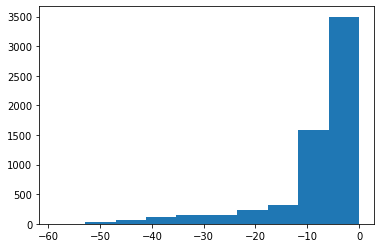

In [2]:
import matplotlib.pyplot as plt
scores = output["score"]
plt.hist(scores)

In [3]:
import numpy as np
print(np.mean(scores))
print(np.sqrt(np.var(scores)))

-8.047089387706293
9.3508169108883


(Something like a gamma distribution, or similar?)

(array([ 3.,  1.,  4.,  0., 19.,  4., 29., 14., 45., 29.]),
 array([0.16666667, 0.25      , 0.33333333, 0.41666667, 0.5       ,
        0.58333333, 0.66666667, 0.75      , 0.83333333, 0.91666667,
        1.        ]),
 <BarContainer object of 10 artists>)

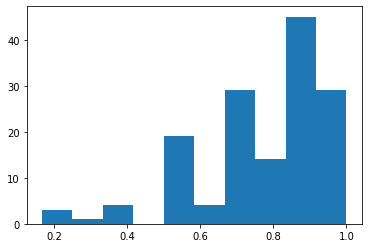

In [4]:
output_aucs = pd.read_csv("../output/output_original_auc-20240218-165024.csv")

aucs = output_aucs["auc"]
plt.hist(aucs)

In [5]:
print(np.mean(aucs)) # Not quite the same as taking _all_ the aucs, weighted by the number in each class?
print(np.median(aucs))
print(len(aucs))

0.7530839178692024
0.8333333333333333
148


In [7]:
aucs

0      0.953109
1      0.877135
2      0.800634
3      0.907100
4      0.541667
         ...   
143    0.666667
144    1.000000
145    1.000000
146    0.833333
147    0.833333
Name: auc, Length: 148, dtype: float64

In [6]:
trimmed_output_aucs = output_aucs.loc[output_aucs['auc'] != 1].loc[output_aucs['auc'] != 0]
trimmed_aucs = trimmed_output_aucs['auc']

We're removing situations where you only have one TCR you're checking against (which are the majority of the cases where AUC $\in \{0,1\}$)

In [8]:
print(np.mean(trimmed_aucs)) # Not quite the same as taking _all_ the aucs, weighted by the number in each class?
print(np.median(trimmed_aucs))
print(len(trimmed_aucs))

0.7028977223141621
0.75
123


In [9]:
binders = output[" binder"]

In [10]:
from sklearn.metrics import roc_auc_score

roc_auc_score(binders, scores)

0.7438107851937948

(array([   4.,    6.,   20.,   36.,   61.,   62.,  150.,  817., 2257.,
        2733.]),
 array([-7.90280609e+01, -7.11252565e+01, -6.32224522e+01, -5.53196478e+01,
        -4.74168434e+01, -3.95140390e+01, -3.16112347e+01, -2.37084303e+01,
        -1.58056259e+01, -7.90282154e+00, -1.71660649e-05]),
 <BarContainer object of 10 artists>)

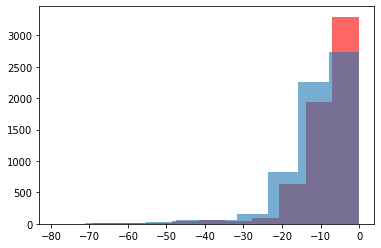

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
mis_output = pd.read_csv("../output/output-20240208-213247_MIS.csv")
mis_scores = mis_output["score"]
plt.hist(mis_scores, color="red", alpha=0.6)
plt.hist(scores, alpha=0.6)

In [1]:
data = pd.read_csv("../input/input_original.csv")

NameError: name 'pd' is not defined